# Example for the usage of the DiffusionAnalysis class

## 1. Imports and defining helper functions
Import the DiffusionAnalysis class and define a helper function

In [1]:
import json

from MembraneAnalysisToolbox.DiffusionAnalysis import DiffusionAnalysis
from MembraneAnalysisToolbox.MembraneStructures import HexagonalMembrane

def analyse_resname(DA, selector: str, short: str):
    print(f"\n{short} analysis")

    DA.calc_passagetimes(selector)
    print(f"\t{short}-passages: " + str(len(DA.passageTimes[selector])))

    DA.calc_diffusion(selector)
    print(f"\t{short}-Diffusioncoefficient: " + str(DA.D[selector]).replace(".", ","))

    fig_1, fig_2 = DA.plot_diffusion(selector)

    DA.plot_starting_points("resname HEX and name C1")

    DA.create_rand_passages_plot("resname HEX and name C1", 1)
    

/bigpool/users/st166545/MembraneAnalysisToolbox/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## 2. Create the class object
Define the path where the traj.xtc and the topol.tpr file and the results folder are located.
Then create the class obect.
- The filepaths and the result paths are constructed
- analysis_max_step_size_ps=200 means that if the step size of the traj.xtc file is smaller than that, only every nth frame is stored and analysed to math the 200ps step for efficiency.
- verbose is set to false in this notebook
- L = 180 tells the class that the membrane thickness is 180 Angstroms

In [2]:
path = "/bigpool/users/ac130484/project/finished_sim/hex/poresize/3nm_NVT/simulation_1/2mus/3/"
print("Path: " + path)

structure = HexagonalMembrane(
            selectors="resname C",
            L=180,
        )

DA = DiffusionAnalysis(
    topology_file=path + "topol.tpr",
    trajectory_file=path + "traj.xtc",
    results_dir=path + "analysis/",
    analysis_max_step_size_ps=2,
    verbose=False,
    membrane = structure
)

print(DA)

Path: /bigpool/users/ac130484/project/finished_sim/hex/poresize/3nm_NVT/simulation_1/2mus/3/


/bigpool/users/st166545/MembraneAnalysisToolbox/.venv/lib/python3.12/site-packages/MDAnalysis/coordinates/XDR.py:202: UserWarning: Cannot write lock/offset file in same location as /bigpool/users/ac130484/project/finished_sim/hex/poresize/3nm_NVT/simulation_1/2mus/3/traj.xtc. Using slow offset calculation.
  warnings.warn(f"Cannot write lock/offset file in same location as "
/bigpool/users/st166545/MembraneAnalysisToolbox/.venv/lib/python3.12/site-packages/MDAnalysis/coordinates/XDR.py:258: UserWarning: Couldn't save offsets because: [Errno 13] Permission denied: '/bigpool/users/ac130484/project/finished_sim/hex/poresize/3nm_NVT/simulation_1/2mus/3/.traj.xtc_offsets.npz'
  warnings.warn(f"Couldn't save offsets because: {e}")


DiffusionAnalysis object:
  topology_file: /bigpool/users/ac130484/project/finished_sim/hex/poresize/3nm_NVT/simulation_1/2mus/3/topol.tpr
  trajectory_file: /bigpool/users/ac130484/project/finished_sim/hex/poresize/3nm_NVT/simulation_1/2mus/3/traj.xtc
  results_dir: /bigpool/users/ac130484/project/finished_sim/hex/poresize/3nm_NVT/simulation_1/2mus/3/analysis/
  Membrane: HexagonalMembrane: selectors=['resname C'], 
L=180, 
lowerZ=None, 
isAtomAbove=None, 
isAtomBelow=None, 
y_middle=None, 
y_range=None
  verbose: False
  trajectories: dict_keys([])
  results: 
      D: {}
      passageTimes: {}
      passageStarts: {}
      passageIndices: {}
      n_passages: {}
  Simulation footprints: 
      u_trajectory_dt (ps): 100.0
      u_sim_time (ps): 2000000.0
      analysis_max_step_size_ps (ps): 2
      actual analysed step_size (ps): 100.0
      nth_frame: 1
      n_frames analysed: 20001
      ana_sim_time (ps): 2000000.0
      u: <Universe with 36930 atoms>
      unique atom names: {'

## 3. Run the analysis
This is done by calling the class-methods in the following order

Lower boundary of the hexagonal structure: 233.23501586914062


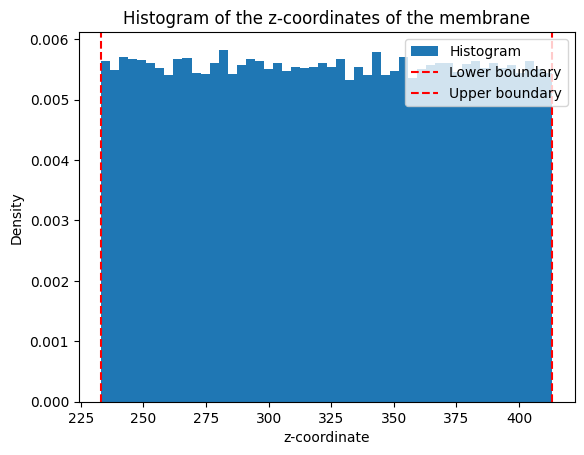

In [3]:

DA.find_membrane_location()
DA.print_membrane_location()
DA.verify_membrane_location()


hex_c1 analysis
	hex_c1-passages: 2611
	hex_c1-Diffusioncoefficient: 86,29359025824535
2611
[1494]
[11331.]
[11331]
[11673.]
[11673]
[2725]


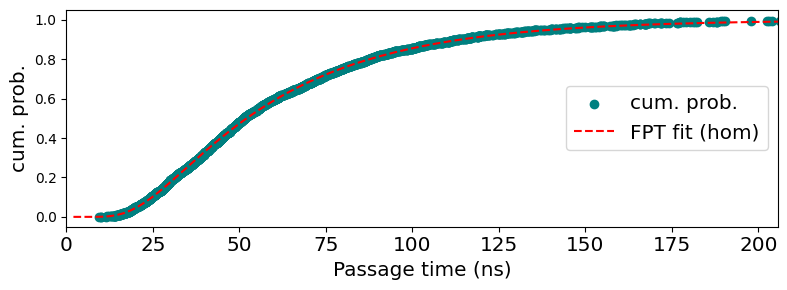

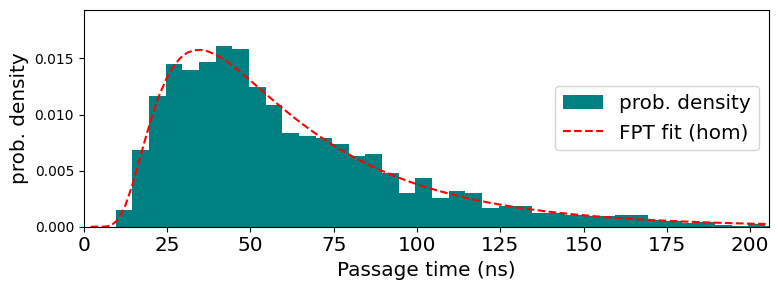

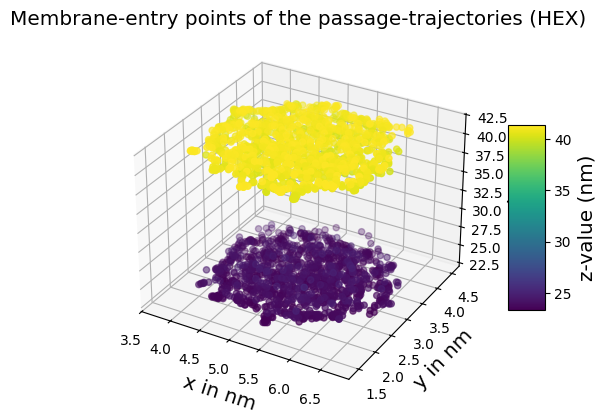

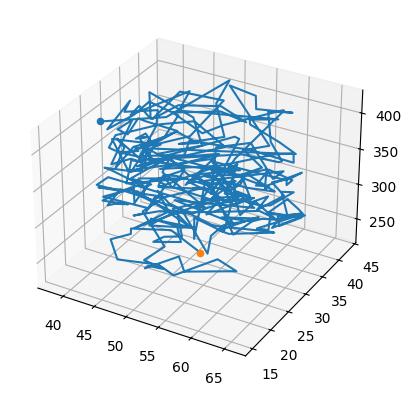

In [4]:
analyse_resname(DA, "resname HEX and name C1", "hex_c1")


dod_c2 analysis


	dod_c2-passages: 913
	dod_c2-Diffusioncoefficient: 35,88624329954945
2611
[637]
[4761.]
[4761]
[5453.]
[5453]
[197]


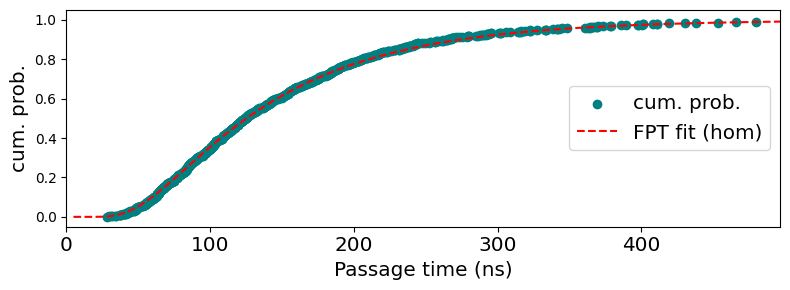

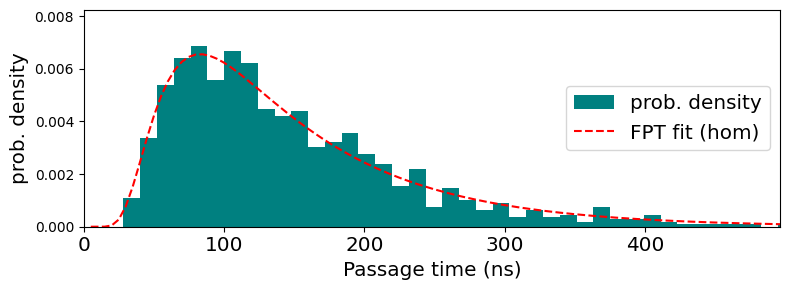

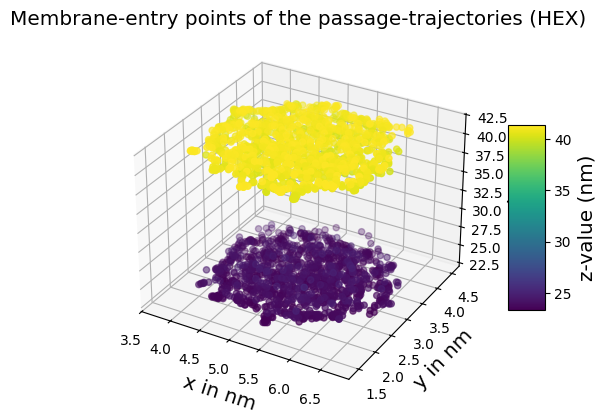

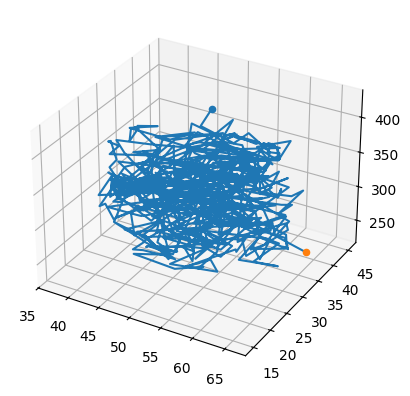

In [5]:
analyse_resname(DA, "resname DOD and name C2", "dod_c2")

In [6]:
print("\n\n\n RESULTS:")
print(json.dumps(DA.D, indent=4))




 RESULTS:
{
    "resname HEX and name C1": 86.29359025824535,
    "resname DOD and name C2": 35.88624329954945
}
